In [1]:
import ebooklib
from ebooklib import epub
from bs4 import BeautifulSoup
import re
fileIn = "diablo1.epub"
fileOut = "diablo1_output.txt"
char_file = "diablo1_char.txt"

In [2]:
def read_book_content(book_name):
    book = epub.read_epub(book_name)
    content = ""
    for item in book.get_items():
        if item.get_type() == ebooklib.ITEM_DOCUMENT:
            bodyContent = item.get_body_content().decode()
            soup = BeautifulSoup(bodyContent)
            for para in soup.find_all("p"):
                content += para.get_text()
                content +='\n'
    return content

content = read_book_content(fileIn)
content2 = read_book_content('diablo2.epub')
content3 = read_book_content('diablo3.epub')

def extract_char_names(content,char_file):
    # I used this to extract all words starting with capital letter to make sure I get all the character's names            
    t=re.findall("(?<!\.)\s+([A-Z][A-Za-z]+)",content)
    with open(char_file, 'w', encoding='utf-8') as fout:
        for item in set(t):
            fout.write(str(item)+'\n')

extract_char_names(content,char_file)
extract_char_names(content2,'diablo2_char.txt')
extract_char_names(content3,'diablo3_char.txt')

#optional: write content to file to check if epub extraction was successful
#with open(fileOut, 'w', encoding='utf-8') as fout:
#        fout.write(content)

C:\Users\Legion\anaconda3\lib\site-packages\ebooklib\epub.py:1395: UserWarning: In the future version we will turn default option ignore_ncx to True.
  warnings.warn('In the future version we will turn default option ignore_ncx to True.')


In [3]:
# I ended up compiling one file for all character in the trilogy
file_name='diablo_sinwar_char_list.txt'
names = []
names_dict={}
def create_char_dict(file_name):
    g = open(file_name,'r',encoding='utf-8')
    for line in g:
        x=line.split('|')
        if x[0].split('\n')[0] not in names:
            names.append(x[0].split('\n')[0])
    for i in names:
        names_dict[i]=i
    g.close()
    
create_char_dict(file_name)

# I need to manually add alternative names after checking the files  
names_dict['Serry'] = 'Serenthia'
names_dict['Mefis'] = 'Mephisto'
names_dict['Bala']='Baal'
names_dict['Dialon']='Diablo'
names_dict['Lilith']='Lylia'
names_dict['Prophet']='Inarius'
names_dict['Linarian']='Rathma'
#Malic can change shapes in book 3, but I did not add this to my analysis as his name will usually be next to his victim and so the interaction is accounted for

#creating a list of all possible words that define characters
names_extra=names.copy()
to_add=['Serry','Mefis','Bala','Dialon', 'Lilith','Prophet','Linarian']
for to in to_add:
    names_extra.append(to)


In [16]:
#if content is read from file after creation
#f = open(fileOut, "r", encoding = 'utf-8')
#full_content = f.read()
#f.close()

#otherwise
#full_content = content2

In [6]:
def create_char_rel(full_content):
    count = 0
    rel={}
    for name in names_extra:
        for word in full_content.split():
            if (count>0):
                count = count-1
            if word == name:
                source = name
                count = 20
            if word in names_extra and names_dict[word]!=names_dict[name] and count>0:
                target = word
                key = names_dict[source]+'-'+names_dict[target]
                if rel.get(key) is None:
                    rel[key]=1
                else:
                    rel[key]+=1;
            elif word==name or word==names_dict[name]:
                count = 20
    return rel

rel1=create_char_rel(content)
rel2=create_char_rel(content2)
rel3=create_char_rel(content3)

In [8]:
# we will have different number for each relationship because we start with one character and we keep counting forward, never backwards
# for example, in the passage Mendeln spoke to Uldyssian, if we search for Uldysian we find zero relationship, but if we search for Mendels we find one
# the total number is the higher number, or we can have directional relationship by which name appears first, would be interesting to see that while Uldysian and Mendeln have high interactions, Mendeln appears first most often.
rel3

{'Uldyssian-Mendeln': 27,
 'Uldyssian-Serenthia': 32,
 'Uldyssian-Achilios': 9,
 'Uldyssian-Inarius': 55,
 'Uldyssian-Jonas': 2,
 'Uldyssian-Lucion': 2,
 'Uldyssian-Zorun': 8,
 'Uldyssian-Terul': 5,
 'Uldyssian-Durram': 2,
 'Uldyssian-Fahin': 3,
 'Uldyssian-Aztuhl': 3,
 'Uldyssian-Malic': 9,
 'Uldyssian-Sehkar': 1,
 'Uldyssian-Ehmad': 8,
 'Uldyssian-Gamuel': 2,
 'Uldyssian-Amolia': 3,
 'Uldyssian-Lylia': 1,
 'Uldyssian-Kethuus': 17,
 'Uldyssian-Worldstone': 2,
 'Uldyssian-Diablo': 6,
 'Uldyssian-Rathma': 11,
 'Uldyssian-Saron': 2,
 'Uldyssian-Tyrael': 5,
 'Mendeln-Rathma': 25,
 'Mendeln-Uldyssian': 39,
 'Mendeln-Serenthia': 15,
 'Mendeln-Vidrisi': 1,
 'Mendeln-Achilios': 15,
 'Mendeln-Fahin': 1,
 'Mendeln-Malic': 11,
 'Mendeln-Inarius': 13,
 'Mendeln-Lylia': 3,
 'Mendeln-Cyrus': 1,
 'Mendeln-Auriel': 3,
 'Mendeln-Malthael': 1,
 'Mendeln-Mephisto': 1,
 'Mendeln-Tyrael': 1,
 'Serenthia-Mendeln': 10,
 'Serenthia-Uldyssian': 14,
 'Serenthia-Cyrus': 1,
 'Serenthia-Fahin': 1,
 'Serenthia-Ach

In [9]:
import pandas as pd

In [10]:
source_list=[]
target_list=[]
weight_list=[]
book_list=[]
def create_char_df(rel_dict,book_no):
    for key,item in rel_dict.items():
        split_key=key.split('-')
        source_list.append(split_key[0])
        target_list.append(split_key[1])
        weight_list.append(item)
        book_list.append(book_no)
        
create_char_df(rel1,1)

create_char_df(rel2,2)

create_char_df(rel3,3)

In [11]:
data = {}
data['target']=target_list
data['source']=source_list
data['weight']=weight_list
data['book']=book_list
df = pd.DataFrame(data)

In [12]:
df.to_csv('sinwar_SNA.csv', sep=',', index=False, encoding='utf-8')

In [1]:
#start graph analysis
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
sinwar = pd.read_csv('sinwar_SNA.csv')
sinwar['weight_inv']=1/sinwar.weight

In [2]:
uldyssian = (
 sinwar.query("book == 1")
 .query("source == 'Uldyssian' or target == 'Uldyssian'")
)

In [3]:
uldyssian.head()

,target,source,weight,book,weight_inv
0,Cyrus,Uldyssian,3,1,0.333333
1,Serenthia,Uldyssian,36,1,0.027778
2,Mendeln,Uldyssian,54,1,0.018519
3,Thiel,Uldyssian,1,1,1.000000
4,Lylia,Uldyssian,65,1,0.015385


In [4]:
all_books_multigraph = nx.from_pandas_edgelist(
            sinwar, source='source', target='target',
            edge_attr=['weight', 'book'],
            create_using=nx.MultiGraph)

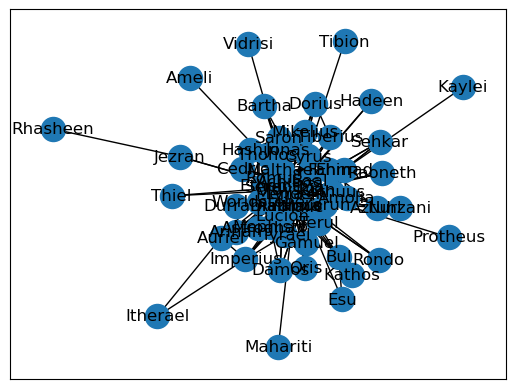

In [5]:
nx.draw_networkx(all_books_multigraph)
plt.show()

In [24]:
from pyvis.network import Network


graphs = [nx.from_pandas_edgelist(
          sinwar[sinwar.book==i],
          source='source', target='target',
          edge_attr=['weight', 'weight_inv'])
          for i in range(1, 4)]

for i in range (0,3):
    scale=2 # Scaling the size of the nodes by 10*degree
    d = dict(graphs[i].degree)

    #Updating dict
    d.update((x, scale*y) for x, y in d.items())

    #Setting up size attribute
    nx.set_node_attributes(graphs[i],d,'size')

    net = Network(notebook=True)
    net.from_nx(graphs[i])
    net.show_buttons()
    net.save_graph("diablo"+str(i)+".html")

In [18]:
graphs = [nx.from_pandas_edgelist(
          sinwar[sinwar.book==i],
          source='source', target='target',
          edge_attr=['weight', 'weight_inv'])
          for i in range(1, 4)]

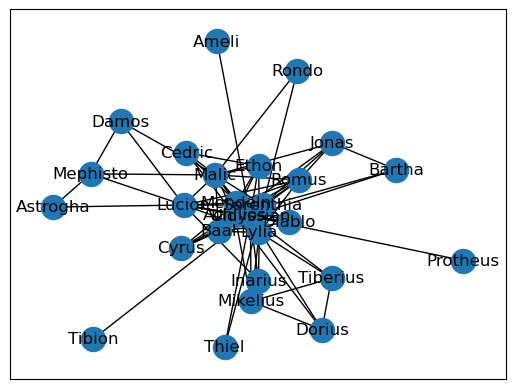

In [26]:
nx.draw_networkx(graphs[0])
plt.show()
#graphs[0]

In [147]:
relationships = list(graphs[0].edges(data=True))

In [148]:
relationships[0:3]

[('Uldyssian', 'Cyrus', {'weight': 2, 'weight_inv': 0.5}),
 ('Uldyssian', 'Serenthia', {'weight': 31, 'weight_inv': 0.03225806451612903}),
 ('Uldyssian', 'Mendeln', {'weight': 54, 'weight_inv': 0.018518518518518517})]

In [171]:
deg_cen_book1 = nx.degree_centrality(graphs[0])
deg_cen_book3 = nx.degree_centrality(graphs[2])

In [150]:
deg_cen_book1['Uldyssian']

0.8461538461538463

In [151]:
sorted(deg_cen_book1.items(),
       key=lambda x:x[1],
       reverse=True)[0:5]

[('Uldyssian', 0.8461538461538463),
 ('Achilios', 0.6153846153846154),
 ('Malic', 0.5384615384615385),
 ('Lylia', 0.46153846153846156),
 ('Lucion', 0.46153846153846156)]

In [152]:
rathma = (
 sinwar.query("book == 3")
 .query("source == 'Rathma' or target == 'Rathma'")
)

In [94]:
rathma.head()

,target,source,weight,book,weight_inv
282,Rathma,Uldyssian,18,3,0.055556
300,Rathma,Mendeln,20,3,0.050000
312,Rathma,Serenthia,1,3,1.000000
317,Achilios,Rathma,2,3,0.500000
318,Mendeln,Rathma,20,3,0.050000


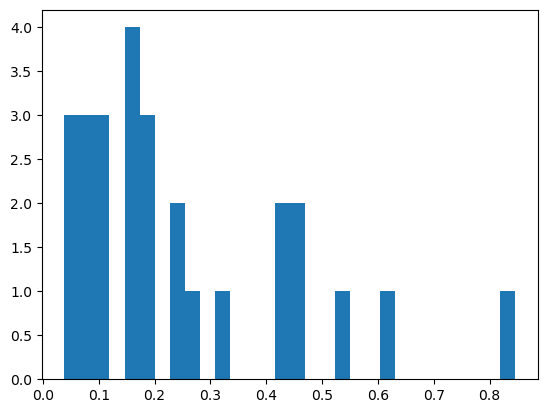

In [153]:
plt.hist(deg_cen_book1.values(), bins=30)
plt.show()

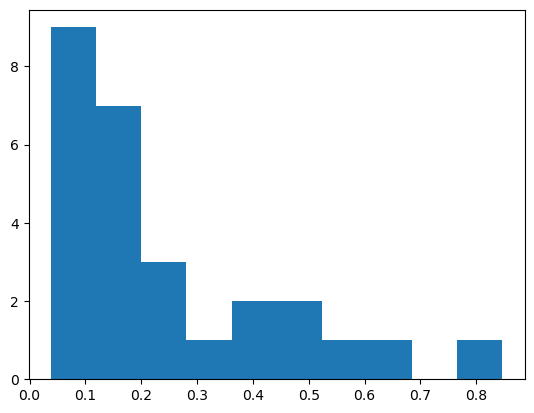

In [154]:
plt.hist(deg_cen_book1.values(),bins=10)
plt.show()

In [172]:
deg_cen_book3

{'Uldyssian': 0.8275862068965517,
 'Baal': 0.10344827586206896,
 'Jezran': 0.06896551724137931,
 'Mendeln': 0.5517241379310345,
 'Lylia': 0.48275862068965514,
 'Malic': 0.1724137931034483,
 'Raoneth': 0.06896551724137931,
 'Serenthia': 0.27586206896551724,
 'Romus': 0.13793103448275862,
 'Achilios': 0.27586206896551724,
 'Lucion': 0.3103448275862069,
 'Arihan': 0.20689655172413793,
 'Rathma': 0.3448275862068966,
 'Inarius': 0.27586206896551724,
 'Bul': 0.1724137931034483,
 'Worldstone': 0.1724137931034483,
 'Astrogha': 0.20689655172413793,
 'Saron': 0.10344827586206896,
 'Hashiri': 0.13793103448275862,
 'Thonos': 0.10344827586206896,
 'Mephisto': 0.3103448275862069,
 'Diablo': 0.3103448275862069,
 'Ethon': 0.034482758620689655,
 'Gamuel': 0.10344827586206896,
 'Oris': 0.06896551724137931,
 'Mahariti': 0.034482758620689655,
 'Esu': 0.06896551724137931,
 'Rhasheen': 0.034482758620689655,
 'Durram': 0.06896551724137931,
 'Kathos': 0.034482758620689655}

In [156]:
sorted(nx.betweenness_centrality(graphs[0]).items(),
       key=lambda x:x[1], reverse=True)[0:10]

[('Uldyssian', 0.4274774114774115),
 ('Malic', 0.13458363858363856),
 ('Lucion', 0.13424420024420025),
 ('Achilios', 0.09901587301587302),
 ('Serenthia', 0.05557264957264957),
 ('Lylia', 0.04626373626373627),
 ('Mendeln', 0.014195360195360197),
 ('Mephisto', 0.00643956043956044),
 ('Jonas', 0.0038974358974358985),
 ('Romus', 0.0036923076923076927)]

In [157]:
sorted(nx.betweenness_centrality(graphs[0],
       weight='weight_inv').items(),
       key=lambda x:x[1], reverse=True)[0:10]

[('Uldyssian', 0.9123076923076923),
 ('Achilios', 0.1523076923076923),
 ('Lucion', 0.14769230769230768),
 ('Malic', 0.07692307692307693),
 ('Serenthia', 0.07076923076923076),
 ('Cyrus', 0.0),
 ('Mendeln', 0.0),
 ('Thiel', 0.0),
 ('Lylia', 0.0),
 ('Dorius', 0.0)]

In [158]:
# by default weight attribute in PageRank is weight
# so we use weight=None to find the unweighted results
sorted(nx.pagerank(graphs[0],
        weight=None).items(),
        key=lambda x:x[1], reverse=True)[0:10]

[('Uldyssian', 0.12581804471227861),
 ('Achilios', 0.08244520287259029),
 ('Malic', 0.07462254094681335),
 ('Lucion', 0.06588659879989005),
 ('Lylia', 0.06272206480547617),
 ('Serenthia', 0.059384645742797774),
 ('Mendeln', 0.05628311909677862),
 ('Romus', 0.04238019559247822),
 ('Baal', 0.037600743460720655),
 ('Ethon', 0.033226688143114066)]

In [159]:
sorted(nx.pagerank(
    graphs[0], weight='weight').items(),
    key=lambda x:x[1], reverse=True)[0:10]

[('Uldyssian', 0.26004608285568503),
 ('Achilios', 0.1104004401027892),
 ('Mendeln', 0.09545933089032875),
 ('Serenthia', 0.07867901257784883),
 ('Lylia', 0.07734844975527767),
 ('Lucion', 0.048502854635342096),
 ('Malic', 0.04586661096520763),
 ('Baal', 0.042860830778837344),
 ('Diablo', 0.03455655177665932),
 ('Ethon', 0.018954164480664226)]

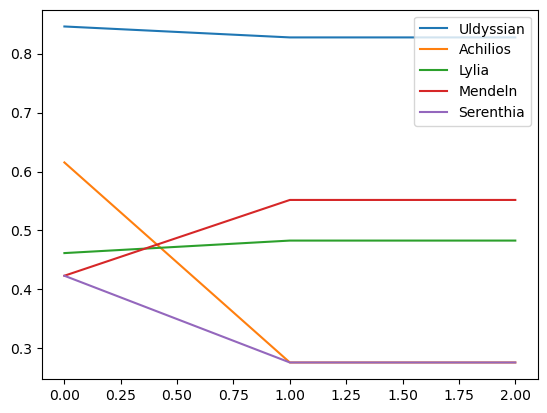

In [184]:
evol = [nx.degree_centrality(graph)
        for graph in graphs]
evol_df = pd.DataFrame.from_records(evol).fillna(0)
evol_df[['Uldyssian',
         'Achilios',
         'Lylia',
         'Mendeln',
         'Serenthia']].plot()
plt.show()

In [164]:
set_of_char = set()
for i in range(3):
    set_of_char |= set(list(evol_df.T[i].sort_values(ascending=False)[0:2].index))
set_of_char

{'Achilios', 'Mendeln', 'Uldyssian'}

In [165]:
sorted(nx.degree_centrality(graphs[0]).items(),
       key=lambda x:x[1], reverse=True)[:5]

[('Uldyssian', 0.8461538461538463),
 ('Achilios', 0.6153846153846154),
 ('Malic', 0.5384615384615385),
 ('Lylia', 0.46153846153846156),
 ('Lucion', 0.46153846153846156)]

In [166]:
sorted(nx.betweenness_centrality(graphs[0]).items(),
       key=lambda x:x[1], reverse=True)[:5]

[('Uldyssian', 0.4274774114774115),
 ('Malic', 0.13458363858363856),
 ('Lucion', 0.13424420024420025),
 ('Achilios', 0.09901587301587302),
 ('Serenthia', 0.05557264957264957)]

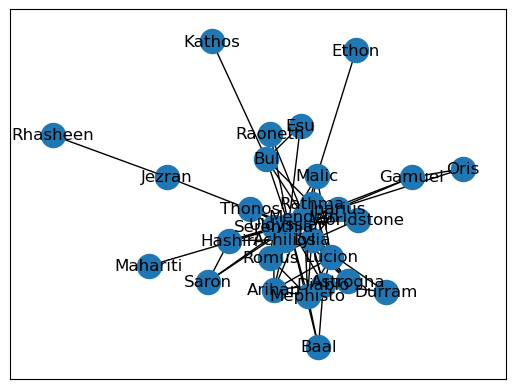

In [168]:
nx.draw_networkx(graphs[2], with_labels=True)

In [185]:
sorted(deg_cen_book3.items(),
       key=lambda x:x[1],
       reverse=True)[0:5]

[('Uldyssian', 0.8275862068965517),
 ('Mendeln', 0.5517241379310345),
 ('Lylia', 0.48275862068965514),
 ('Rathma', 0.3448275862068966),
 ('Lucion', 0.3103448275862069)]

In [195]:
relationships3 = list(graphs[0].edges(data=True))

,target,source,weight,book,weight_inv
0,Cyrus,Uldyssian,3,1,0.333333
1,Serenthia,Uldyssian,36,1,0.027778
2,Mendeln,Uldyssian,54,1,0.018519
3,Thiel,Uldyssian,1,1,1.000000
4,Lylia,Uldyssian,65,1,0.015385
...,...,...,...,...,...
407,Romus,Lylia,3,3,0.333333
408,Durram,Lylia,3,3,0.333333
409,Astrogha,Lylia,4,3,0.250000
410,Thonos,Lylia,1,3,1.000000


In [207]:
rel3

{'Uldyssian-Mendeln': 27,
 'Uldyssian-Serenthia': 32,
 'Uldyssian-Achilios': 9,
 'Uldyssian-Inarius': 55,
 'Uldyssian-Jonas': 2,
 'Uldyssian-Lucion': 2,
 'Uldyssian-Zorun': 8,
 'Uldyssian-Terul': 5,
 'Uldyssian-Durram': 2,
 'Uldyssian-Fahin': 3,
 'Uldyssian-Aztuhl': 3,
 'Uldyssian-Malic': 9,
 'Uldyssian-Sehkar': 1,
 'Uldyssian-Ehmad': 8,
 'Uldyssian-Gamuel': 2,
 'Uldyssian-Amolia': 3,
 'Uldyssian-Lylia': 1,
 'Uldyssian-Kethuus': 17,
 'Uldyssian-Worldstone': 2,
 'Uldyssian-Diablo': 6,
 'Uldyssian-Rathma': 11,
 'Uldyssian-Saron': 2,
 'Uldyssian-Tyrael': 5,
 'Mendeln-Rathma': 24,
 'Mendeln-Uldyssian': 39,
 'Mendeln-Serenthia': 15,
 'Mendeln-Vidrisi': 1,
 'Mendeln-Achilios': 15,
 'Mendeln-Fahin': 1,
 'Mendeln-Malic': 11,
 'Mendeln-Inarius': 13,
 'Mendeln-Lylia': 3,
 'Mendeln-Cyrus': 1,
 'Mendeln-Auriel': 3,
 'Mendeln-Malthael': 1,
 'Mendeln-Mephisto': 1,
 'Mendeln-Tyrael': 1,
 'Serenthia-Mendeln': 10,
 'Serenthia-Uldyssian': 14,
 'Serenthia-Cyrus': 1,
 'Serenthia-Fahin': 1,
 'Serenthia-Ach

In [208]:
data

{'target': ['Cyrus',
  'Serenthia',
  'Mendeln',
  'Thiel',
  'Lylia',
  'Achilios',
  'Dorius',
  'Tiberius',
  'Mikelius',
  'Malic',
  'Lucion',
  'Ethon',
  'Protheus',
  'Jonas',
  'Romus',
  'Cedric',
  'Inarius',
  'Bartha',
  'Uldyssian',
  'Serenthia',
  'Achilios',
  'Lylia',
  'Ethon',
  'Malic',
  'Cyrus',
  'Lucion',
  'Uldyssian',
  'Cyrus',
  'Mendeln',
  'Achilios',
  'Lylia',
  'Malic',
  'Lucion',
  'Romus',
  'Uldyssian',
  'Serenthia',
  'Achilios',
  'Mendeln',
  'Ethon',
  'Malic',
  'Mendeln',
  'Uldyssian',
  'Lylia',
  'Dorius',
  'Serenthia',
  'Cyrus',
  'Mikelius',
  'Ethon',
  'Malic',
  'Cedric',
  'Bartha',
  'Lucion',
  'Romus',
  'Lylia',
  'Lucion',
  'Mephisto',
  'Malic',
  'Damos',
  'Uldyssian',
  'Astrogha',
  'Lylia',
  'Achilios',
  'Romus',
  'Diablo',
  'Lucion',
  'Serenthia',
  'Uldyssian',
  'Rondo',
  'Achilios',
  'Mephisto',
  'Damos',
  'Lucion',
  'Mendeln',
  'Ethon',
  'Lylia',
  'Jonas',
  'Uldyssian',
  'Uldyssian',
  'Lylia',
  'M